In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [19]:
df = pd.read_csv('iris.csv')

Realizar un análisis descriptivo del dataset que cuente con exploración de sus valores: rango, mínimos, máximos, varianza, desvío, valores promedio y medios, etc.

Mostrar distribución de los datos mediante histogramas

Explorar la correlación existente entre las diferentes columnas

Graficar de a pares las columnas para identificar el comportamiento de los valores según las especies.

In [23]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df.shape

(150, 6)

In [25]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

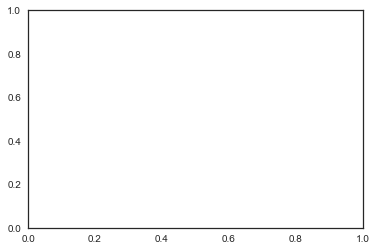

In [75]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace (1,100,100)

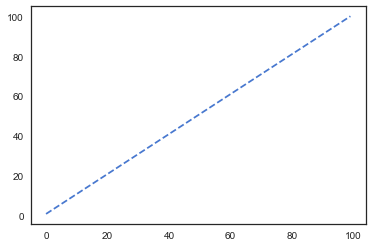

In [76]:
plt.plot((x), linestyle = 'dashed');

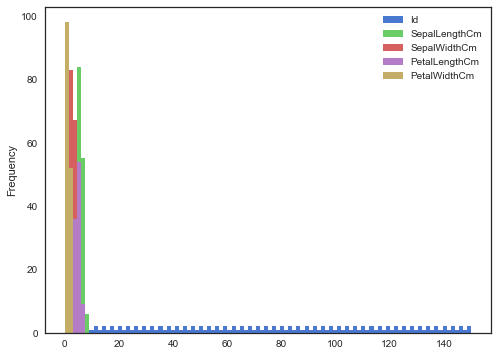

In [65]:
df[:].plot(kind='hist', rot=360, figsize=(8, 6), bins=100);

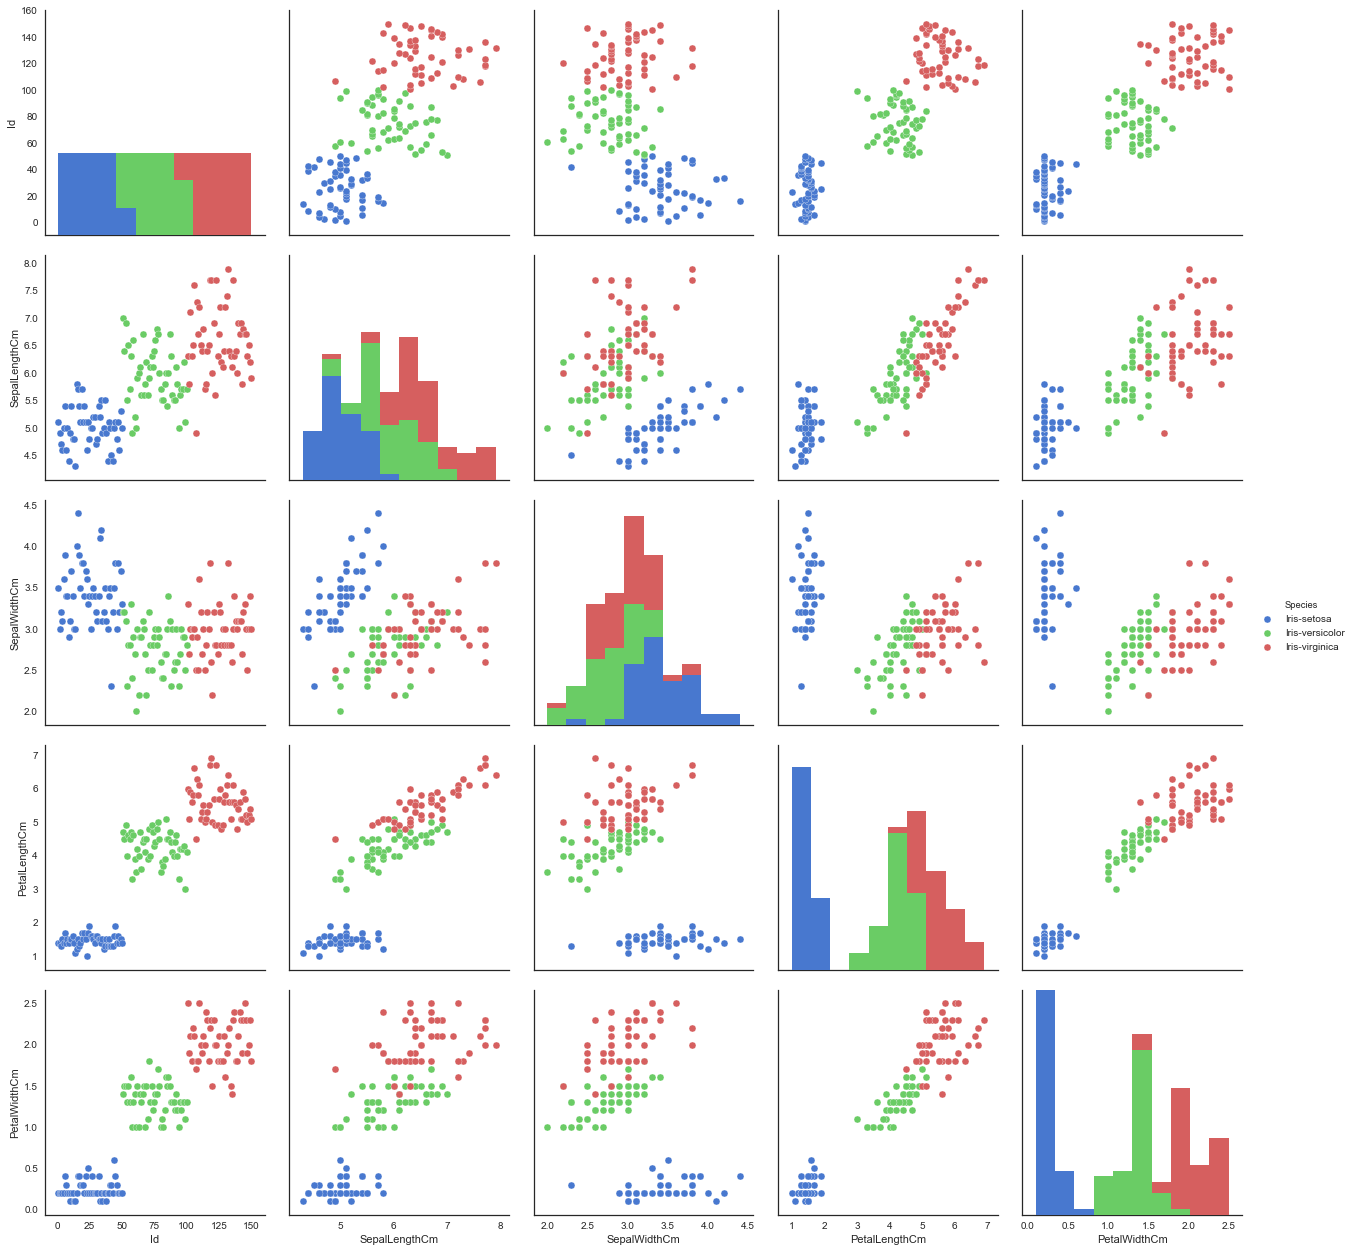

In [84]:
sns.pairplot(df, hue ='Species', size = 3.5);

In [101]:
print(df[df.columns[1:]].describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


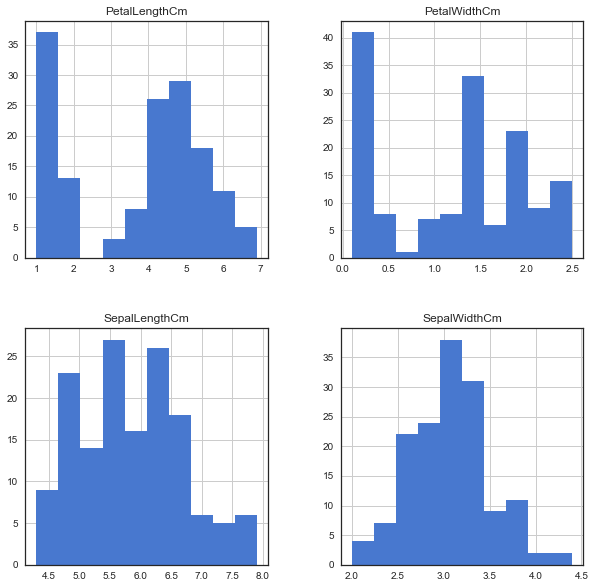

In [89]:
df.hist(column=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"],figsize=(10, 10));

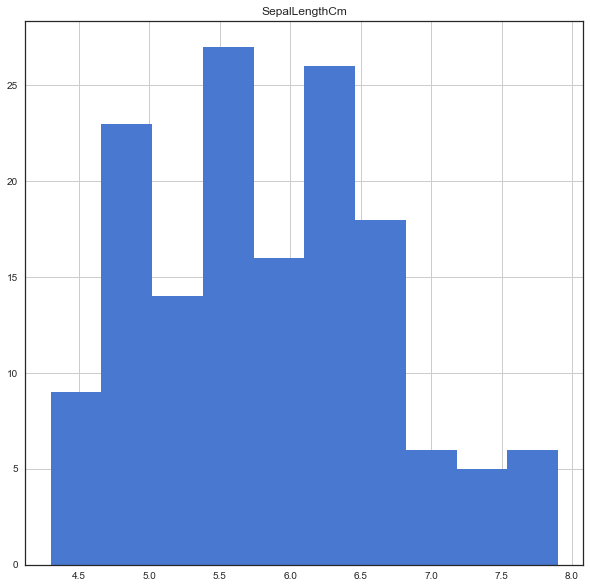

In [90]:
df.hist(column=["SepalLengthCm"],figsize=(10, 10));

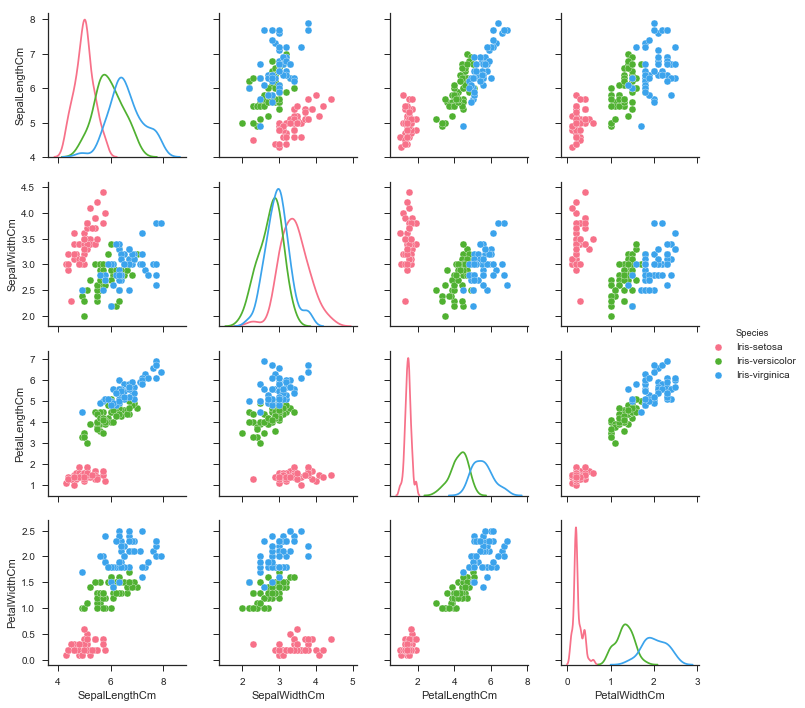

In [99]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df.drop('Id', axis=1), diag_kind='kde', hue="Species", palette="husl");


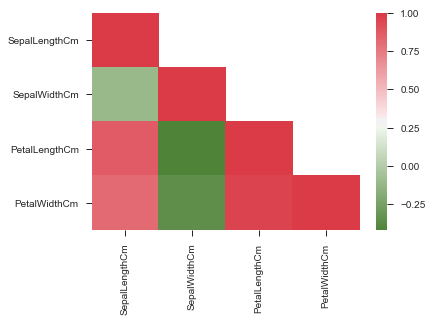

In [108]:
# Sacamos el id
dt = df[df.columns[1:]]


corr = dt.corr() #returns a dataframe, so it can be reused

# Quitamos el triangulo superior para facilitar la lectura
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)

# Utilizamos el heatmap de seaborn para visualizar
sns.heatmap(corr, cmap=sns.diverging_palette(120, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)